In [1]:
import pandas
import numpy
import scipy
from scipy import stats

import matplotlib.pyplot as plot

# Test 1

In [2]:
skips1 = 0

In [3]:
test_1_data = pandas.read_csv('Drift Test ph and temp 06 12 2019 - 09', sep='	', header = None, 
                              usecols = [0, 1, 2, 3],
                              names = ["Date", "Time", "Temp", "pH"],
                              skiprows = skips1)

In [4]:
test_1_data

,Date,Time,Temp,pH
0,2019/12/06,09:05:27 AM,23.663528,8.811172
1,2019/12/06,09:05:28 AM,23.728594,8.840874
2,2019/12/06,09:05:29 AM,23.745982,8.869581
3,2019/12/06,09:05:30 AM,23.771789,8.926380
4,2019/12/06,09:05:31 AM,23.800850,8.969278
...,...,...,...,...
274842,2019/12/09,01:26:15 PM,35.395706,5.921942
274843,2019/12/09,01:26:16 PM,35.395765,5.966076
274844,2019/12/09,01:26:17 PM,35.396788,6.085856
274845,2019/12/09,01:26:18 PM,35.396690,6.285516


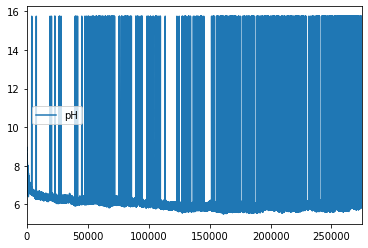

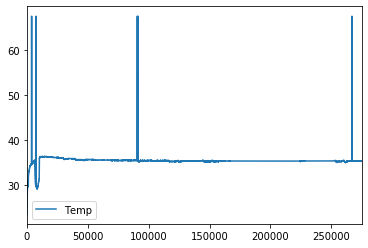

In [5]:
test_1_data.plot(y = "pH")
test_1_data.plot(y = "Temp")

In [6]:
z1 = numpy.abs(stats.zscore(test_1_data.pH))
print(z1, len(z1))

[0.95453737 0.96749377 0.98001613 ... 0.23428023 0.14718599 0.11727401] 274847


In [7]:
threshold = 1
print(numpy.where(z1 > threshold))

(array([     3,      4,      5, ..., 274647, 274648, 274649], dtype=int64),)


In [8]:
test_1_data_trimmed = test_1_data[(z1 < threshold)]
test_1_data_trimmed

,Date,Time,Temp,pH
0,2019/12/06,09:05:27 AM,23.663528,8.811172
1,2019/12/06,09:05:28 AM,23.728594,8.840874
2,2019/12/06,09:05:29 AM,23.745982,8.869581
6,2019/12/06,09:05:33 AM,23.856732,8.907670
7,2019/12/06,09:05:34 AM,23.880345,8.833689
...,...,...,...,...
274842,2019/12/09,01:26:15 PM,35.395706,5.921942
274843,2019/12/09,01:26:16 PM,35.395765,5.966076
274844,2019/12/09,01:26:17 PM,35.396788,6.085856
274845,2019/12/09,01:26:18 PM,35.396690,6.285516


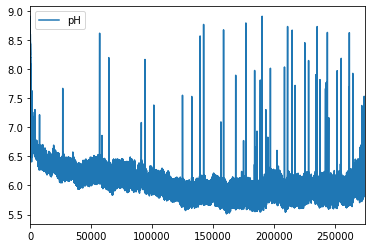

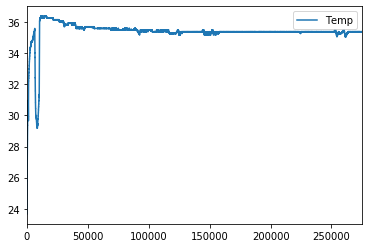

In [9]:
test_1_data_trimmed.plot(y = "pH")
test_1_data_trimmed.plot(y = "Temp")

In [10]:
rolling_window = 240

In [11]:
test_1_data_trimmed.pH

0         8.811172
1         8.840874
2         8.869581
6         8.907670
7         8.833689
            ...   
274842    5.921942
274843    5.966076
274844    6.085856
274845    6.285516
274846    6.354088
Name: pH, Length: 258657, dtype: float64

In [12]:
test_1_data_rolling = test_1_data_trimmed.rolling(rolling_window).mean().dropna()

In [13]:
test_1_data_rolling

,Temp,pH
242,25.618928,8.432862
243,25.632774,8.429344
244,25.646347,8.425886
245,25.659852,8.422606
246,25.672891,8.419452
...,...,...
274842,35.396561,6.134926
274843,35.396560,6.134315
274844,35.396561,6.133856
274845,35.396561,6.135003


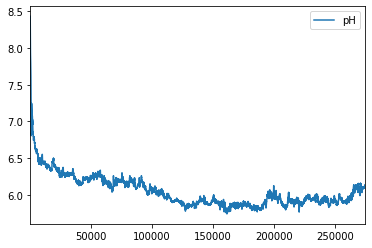

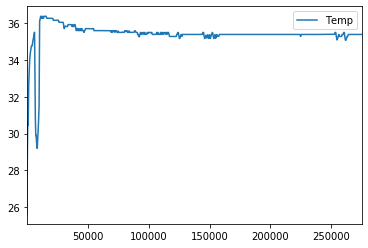

In [14]:
test_1_data_rolling.plot(y = "pH")
test_1_data_rolling.plot(y = "Temp")

In [15]:
x1 = numpy.arange(skips1,len(test_1_data_rolling.pH)+skips1)
order1 = 1

In [16]:
x1_extended = numpy.arange(skips1,len(test_1_data.pH)+10000+skips1)

In [17]:
test_1_ph_rolling_poly = numpy.poly1d(numpy.polyfit( x1, test_1_data_rolling.pH, order1))
print(test_1_ph_rolling_poly)

 
-2.176e-06 x + 6.333


In [18]:
fit_1_ph_poly = pandas.DataFrame(test_1_ph_rolling_poly(x1_extended))

In [19]:
test_1_ph_comp = pandas.concat([test_1_data_rolling.pH,fit_1_ph_poly], axis = 1)
test_1_ph_comp.columns = ["Experimental", "Polyfit"]

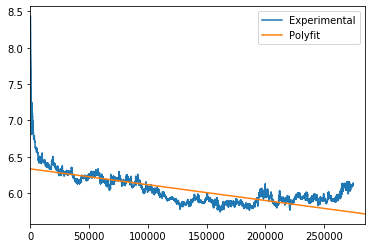

In [20]:
test_1_ph_comp.plot()

# Test 2

In [21]:
skips2 = skips1

In [22]:
test_2_data = pandas.read_csv('Drift Test 2 ph and temp 11 12 2019 - Finished', sep='	', header = None, 
                              usecols = [0, 1, 2, 3],
                              names = ["Date", "Time", "Temp", "pH"],
                              skiprows = skips2)

In [23]:
test_2_data

,Date,Time,Temp,pH
0,2019/12/11,12:13:30 PM,26.575789,5.660700
1,2019/12/11,12:13:31 PM,26.575219,5.660709
2,2019/12/11,12:13:32 PM,26.574864,5.665180
3,2019/12/11,12:13:33 PM,26.575445,5.665019
4,2019/12/11,12:13:34 PM,26.575622,5.665168
...,...,...,...,...
510515,2019/12/17,10:01:55 AM,34.938508,5.867898
510516,2019/12/17,10:01:56 AM,34.938173,5.863336
510517,2019/12/17,10:01:57 AM,34.938311,5.862251
510518,2019/12/17,10:01:58 AM,34.944763,5.862182


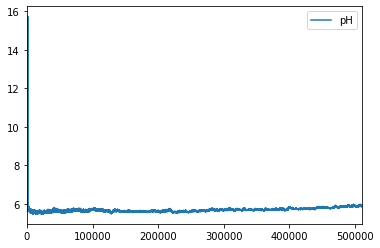

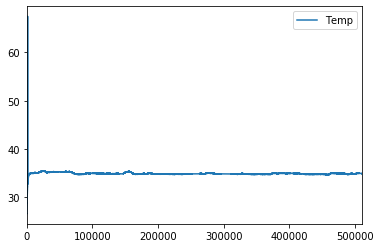

In [24]:
test_2_data.plot(y = "pH")
test_2_data.plot(y = "Temp")

In [25]:
x2 = numpy.arange(skips2,len(test_2_data.pH)+skips2)
order2 = 1

In [26]:
len(x2), len(test_2_data.pH)

(510520, 510520)

In [27]:
x2_extended = numpy.arange(skips2,len(test_2_data.pH)+10000+skips2)

In [28]:
test_2_ph_poly = numpy.poly1d(numpy.polyfit( x2, test_2_data.pH, order2))
print(test_2_ph_poly)

 
4.362e-07 x + 5.573


In [29]:
fit_2_ph_poly = pandas.DataFrame(test_2_ph_poly(x2_extended))

In [30]:
test_2_ph_comp = pandas.concat([test_2_data.pH,fit_2_ph_poly], axis = 1)
test_2_ph_comp.columns = ["Experimental", "Polyfit"]

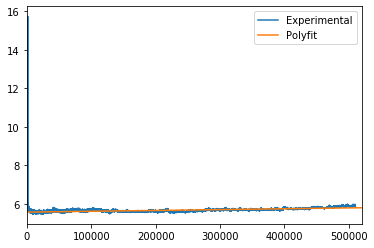

In [31]:
test_2_ph_comp.plot()

## Noise Reduction
Reduce noise via rolling average

In [32]:
rolling_window = 240

In [33]:
test_2_data_rolling = test_2_data.rolling(rolling_window).mean().pH.dropna()
test_2_data_rolling

239       5.674022
240       5.674064
241       5.674119
242       5.674166
243       5.674232
            ...   
510515    5.886351
510516    5.886226
510517    5.886108
510518    5.885990
510519    5.885871
Name: pH, Length: 510281, dtype: float64

In [34]:
test_2_ph_rolling_poly = numpy.poly1d(numpy.polyfit( x2[rolling_window-1:], test_2_data_rolling, order2))
print(test_2_ph_rolling_poly)

 
4.362e-07 x + 5.573


In [35]:
fit_2_ph_rolling_poly = pandas.DataFrame(test_2_ph_rolling_poly(x2_extended))

In [36]:
test_2_ph_comp_2 = pandas.concat([test_2_ph_comp, test_2_data_rolling, fit_2_ph_rolling_poly], axis = 1)
test_2_ph_comp_2.columns = ["Experimental", "Polyfit", "Moving Average","Fit after Noise Reduction"]

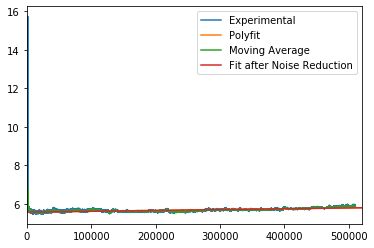

In [37]:
test_2_ph_comp_2.plot()

In [38]:
print(test_2_ph_rolling_poly)
print(test_2_ph_poly)

 
4.362e-07 x + 5.573
 
4.362e-07 x + 5.573


# Test 3

In [39]:
skips3 = skips2
Nrows = 290000-skips3

In [40]:
test_3_data = pandas.read_csv('Drift Test 3 ph and temp 17 12 2019 pH7 Buffer secondary rig', sep='	', header = None, 
                              usecols = [0, 1, 2, 3],
                              names = ["Date", "Time", "Temp", "pH"], nrows = Nrows, skiprows = skips3)

In [41]:
test_3_data

,Date,Time,Temp,pH
0,2019/12/17,10:59:24 AM,18.548190,8.444315
1,2019/12/17,10:59:25 AM,18.547846,8.437364
2,2019/12/17,10:59:26 AM,18.548219,8.435781
3,2019/12/17,10:59:27 AM,18.548121,8.438819
4,2019/12/17,10:59:28 AM,18.548328,8.463300
...,...,...,...,...
289995,2019/12/20,07:32:45 PM,24.977649,7.296660
289996,2019/12/20,07:32:46 PM,24.977384,7.296749
289997,2019/12/20,07:32:47 PM,24.964864,7.296616
289998,2019/12/20,07:32:48 PM,24.964903,7.296442


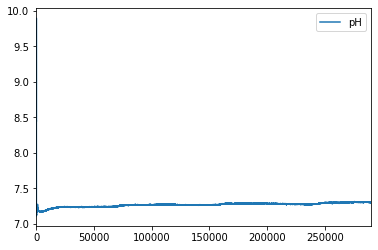

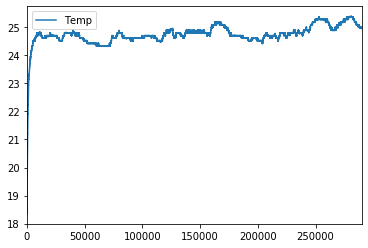

In [42]:
test_3_data.plot(y = "pH")
test_3_data.plot(y = "Temp")

In [43]:
x3 = numpy.arange(skips3,len(test_3_data.pH)+skips3)
order3 = 1

In [44]:
len(x3), len(test_3_data.pH)

(290000, 290000)

In [45]:
x3_extended = numpy.arange(skips3,len(test_3_data.pH)+10000+skips3)

In [46]:
test_3_ph_poly = numpy.poly1d(numpy.polyfit( x3, test_3_data.pH, order3))
print(test_3_ph_poly)

 
2.832e-07 x + 7.222


In [47]:
fit_3_ph_poly = pandas.DataFrame(test_3_ph_poly(x3_extended))

In [48]:
test_3_ph_comp = pandas.concat([test_3_data.pH,fit_3_ph_poly], axis = 1)
test_3_ph_comp.columns = ["Experimental", "Polyfit"]

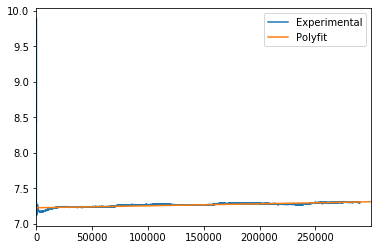

In [49]:
test_3_ph_comp.plot()

## Noise Reduction
Reduce noise via rolling average

In [50]:
rolling_window = 240

In [51]:
test_3_data_rolling = test_3_data.rolling(rolling_window).mean().pH.dropna()
test_3_data_rolling

239       7.466373
240       7.460930
241       7.455518
242       7.450112
243       7.444694
            ...   
289995    7.297186
289996    7.297187
289997    7.297187
289998    7.297187
289999    7.297188
Name: pH, Length: 289761, dtype: float64

In [52]:
test_3_ph_rolling_poly = numpy.poly1d(numpy.polyfit( x3[rolling_window-1:], test_3_data_rolling, order3))
print(test_3_ph_rolling_poly)

 
2.876e-07 x + 7.222


In [53]:
fit_3_ph_rolling_poly = pandas.DataFrame(test_3_ph_rolling_poly(x3_extended))

In [54]:
test_3_ph_comp_2 = pandas.concat([test_3_ph_comp, test_3_data_rolling, fit_3_ph_rolling_poly], axis = 1)
test_3_ph_comp_2.columns = ["Experimental", "Polyfit", "Moving Average","Fit after Noise Reduction"]

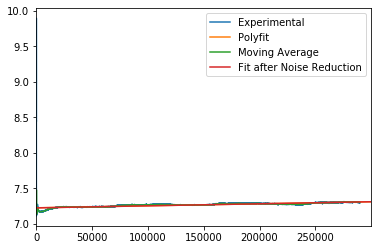

In [55]:
test_3_ph_comp_2.plot()

In [56]:
print(test_3_ph_rolling_poly)
print(test_3_ph_poly)

 
2.876e-07 x + 7.222
 
2.832e-07 x + 7.222


# All Poly Comp

In [57]:
print("Test 1", "\n",test_1_ph_rolling_poly, "\n", "\n")

print("Test 2", "\n",test_2_ph_poly)
print(test_2_ph_rolling_poly, "\n", "\n")

print("Test 3", "\n",test_3_ph_poly)
print(test_3_ph_rolling_poly, "\n", "\n")

Test 1 
  
-2.176e-06 x + 6.333 
 

Test 2 
  
4.362e-07 x + 5.573
 
4.362e-07 x + 5.573 
 

Test 3 
  
2.832e-07 x + 7.222
 
2.876e-07 x + 7.222 
 

